# Decision Tree Classifier Project - Insurance Claim Predictor

### About the project 

This project aims to build a predictive model to determine if a building will have an insurance claim during a certain period or not. The Capstone project would predict the probability of having at least one claim over the insured period of the building. 

The model will be based on the building characteristics. The target variable Claim is:

1 - if the building has at least a claim over the insured period. 

0 - if the building doesn’t have a claim over the insured period.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
insurance_df = pd.read_csv("C:\\Users\\segun\\OneDrive\\Documents\\AI Now Incubator Hub\\Datasets\\Train_data.csv")
insurance_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


## Data Preprocessing:
1. The raw data has been collected and ingested into the notebook
2. The duplicates will be removed
3. The missing values will be handled by imputation or deletion depending on the size and impacvt
4. Box plot will be used to detect outliers
5. Inconsistent or incorrect data will be handles
6. The categorical variables will be encoded
7. The umerical data will be normalized or standardized
8. Feature Scaling will be done 
9. The data will be transformed (log, square root, aggregation, etc.)
10. Reducing dimensionality (feature selection/extraction) - to identify variables that have the highest impact on our target variables
11. The noisy data will be handled by removing variables that have little or no impact on our prediction
12. The data will be splitted into(training and testing data)
13. Any class imbalance in our dataset will be handled
14. The data quality and consistency will be verified

In [3]:
# Checking for null values
insurance_df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [4]:
# Checking the shape of the dataframe
insurance_df.shape

(7160, 14)

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [6]:
# checking for number of unique values in the target
insurance_df.Claim.nunique()

2

In [7]:
# Checking possible numerical values (0, 1, 2)
set(insurance_df.Claim)

{0, 1}

In [8]:
ratio = insurance_df['Claim'].nunique()/insurance_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 0.03 %


In [9]:
# checking for duplicate
insurance_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7155    False
7156    False
7157    False
7158    False
7159    False
Length: 7160, dtype: bool

In [10]:
# Count how many duplicate rows exist
insurance_df.duplicated().sum()

0

In [11]:
# Check duplicates based on specific columns
insurance_df[insurance_df.duplicated(subset=['Customer Id', 'YearOfObservation'], keep=False)]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim


In [12]:
insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearOfObservation,7160.0,2013.669553,1.383769,2012.0,2012.000000,2013.0,2015.00,2016.0
Insured_Period,7160.0,0.909758,0.239756,0.0,0.997268,1.0,1.00,1.0
Residential,7160.0,0.305447,0.460629,0.0,0.000000,0.0,1.00,1.0
Building Dimension,7054.0,1883.727530,2278.157745,1.0,528.000000,1083.0,2289.75,20940.0
Building_Type,7160.0,2.186034,0.940632,1.0,2.000000,2.0,3.00,4.0
Date_of_Occupancy,6652.0,1964.456404,36.002014,1545.0,1960.000000,1970.0,1980.00,2016.0
Claim,7160.0,0.228212,0.419709,0.0,0.000000,0.0,0.00,1.0


In [13]:
type(insurance_df)

pandas.core.frame.DataFrame

In [14]:
insurance_df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [15]:
print(list(insurance_df.columns))

['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Geo_Code', 'Claim']


In [16]:
median_year = int(insurance_df["Date_of_Occupancy"].median())

In [17]:
insurance_df["Date_of_Occupancy"] = insurance_df["Date_of_Occupancy"].fillna(median_year)

In [18]:
median_Building_Dimension = insurance_df["Building Dimension"].median()

In [19]:
insurance_df["Building Dimension"] = insurance_df["Building Dimension"].fillna(median_Building_Dimension)

In [20]:
string_list = [
    'Customer Id', 'Building_Painted', 'Building_Fenced',
    'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code'
]
for header in string_list:
    insurance_df[header] = insurance_df[header].astype('string')

integer_list = ['YearOfObservation', 'Residential', 'Building_Type', 'Claim']
for header in integer_list:
    insurance_df[header] = insurance_df[header].astype('int16')

insurance_df["Date_of_Occupancy"] = insurance_df["Date_of_Occupancy"].astype('int16')

float_list = ['Insured_Period', 'Building Dimension']
for header in float_list:
    insurance_df[header] = insurance_df[header].astype('float16')

insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   string 
 1   YearOfObservation   7160 non-null   int16  
 2   Insured_Period      7160 non-null   float16
 3   Residential         7160 non-null   int16  
 4   Building_Painted    7160 non-null   string 
 5   Building_Fenced     7160 non-null   string 
 6   Garden              7153 non-null   string 
 7   Settlement          7160 non-null   string 
 8   Building Dimension  7160 non-null   float16
 9   Building_Type       7160 non-null   int16  
 10  Date_of_Occupancy   7160 non-null   int16  
 11  NumberOfWindows     7160 non-null   string 
 12  Geo_Code            7058 non-null   string 
 13  Claim               7160 non-null   int16  
dtypes: float16(2), int16(5), string(7)
memory usage: 489.6 KB


In [21]:
# Rechecking for null values
insurance_df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [22]:
insurance_df["Garden"] = insurance_df["Garden"].fillna('O')

In [23]:
insurance_df2 = insurance_df.drop(columns=['Geo_Code'])

In [24]:
#insurance_df2 = insurance_df.drop(columns=['Geo_Code'], inplace=True

In [25]:
insurance_df2.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Claim                 0
dtype: int64

In [26]:
# Adding a New Column

In [27]:
insurance_df2['Building_Age'] = (insurance_df['YearOfObservation'] - insurance_df['Date_of_Occupancy']).astype('int16')

Assumptions made for Missing Values
Garden (7) – From the review of the data, all houses with Building Not Fenced (N) does not have a garden. All the 7 Null Values Building Fenced status  is “N”. This imply the Garden symbol is “O”.
Building Dimension (106) – Use Mean or Median
Geo Code – Not relevant for the analysis, the column can be dropped


In [28]:
insurance_df2.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim', 'Building_Age'],
      dtype='object')

In [29]:
#insurance_df2["YearOfObservation"] = insurance_df2["YearOfObservation"].round().astype(int)

In [30]:
insurance_df2["YearOfObservation"] = insurance_df2["YearOfObservation"].round().astype(int)

In [31]:
df = insurance_df2[['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim', 'Building_Age']]

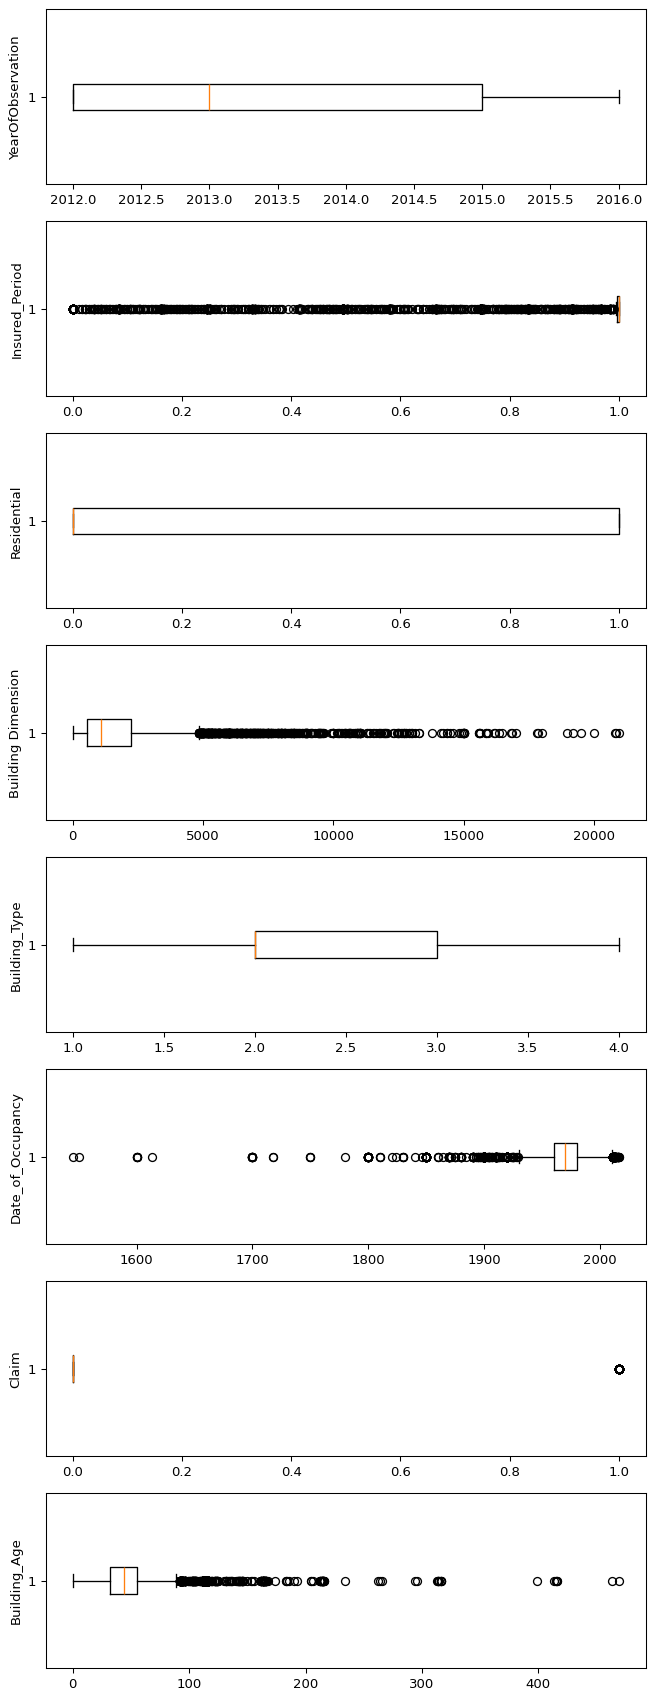

In [32]:
num_df = df.select_dtypes(include='number')

fig, axs = plt.subplots(len(num_df.columns), 1, figsize=(7, 18), dpi=95)

for i, col in enumerate(num_df.columns):
    axs[i].boxplot(num_df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()

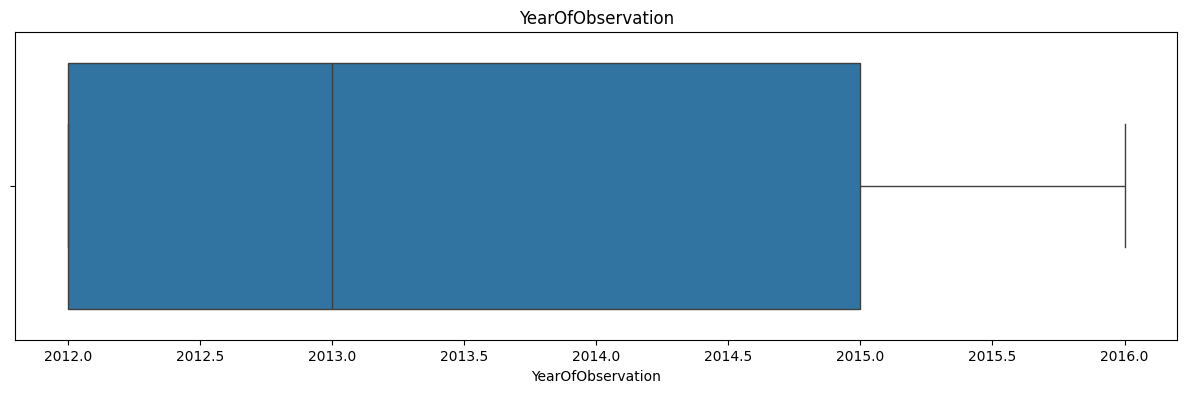

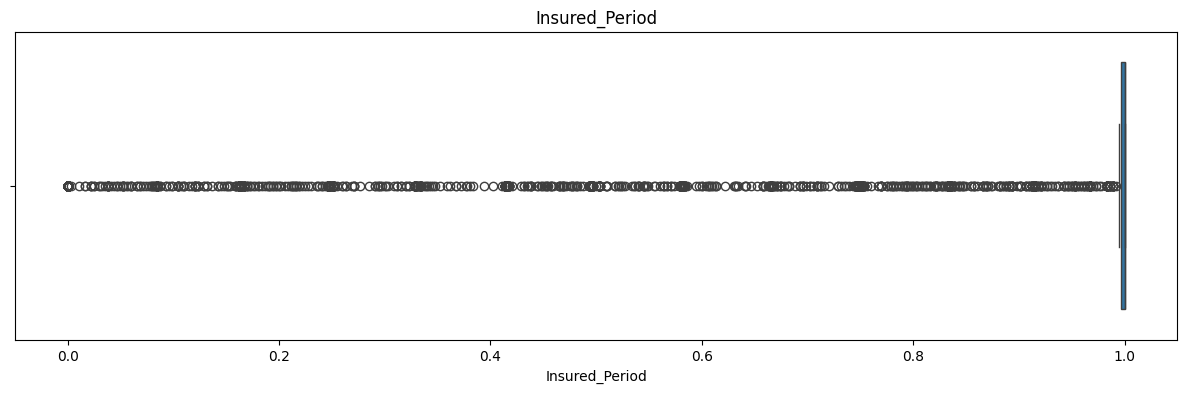

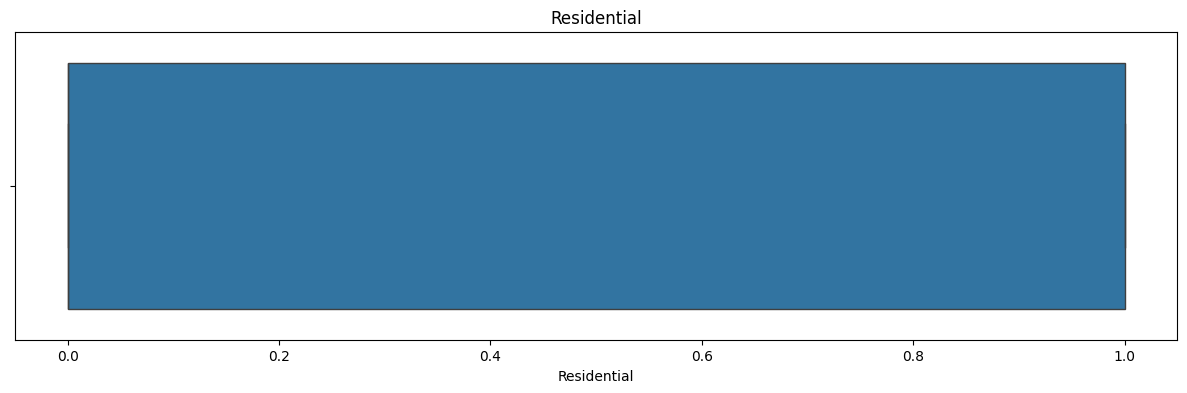

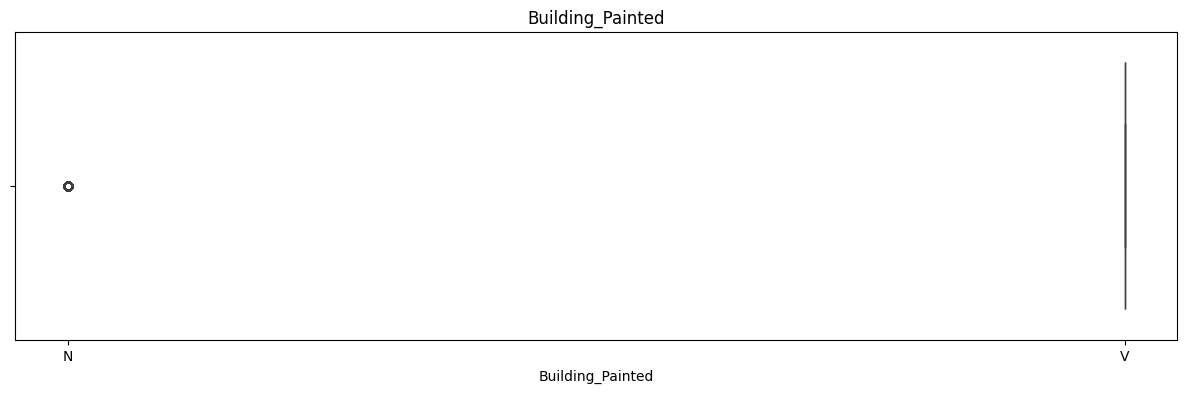

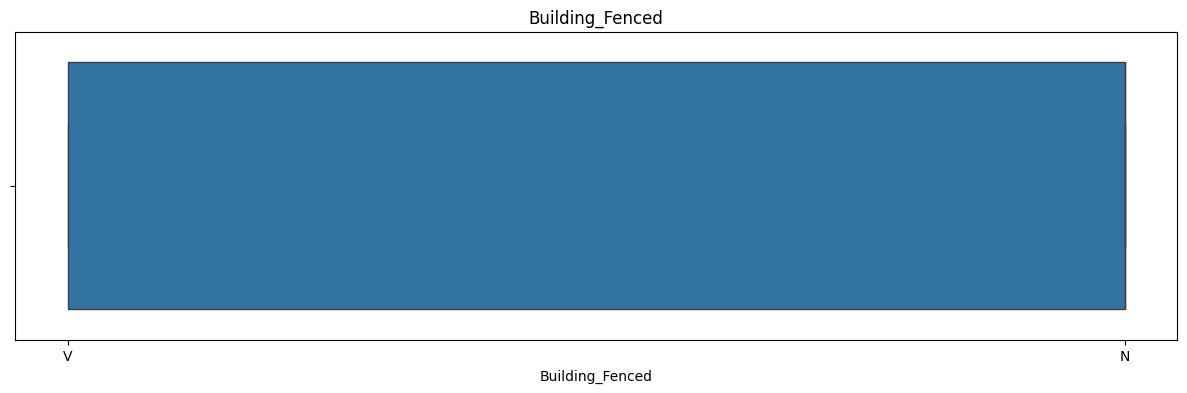

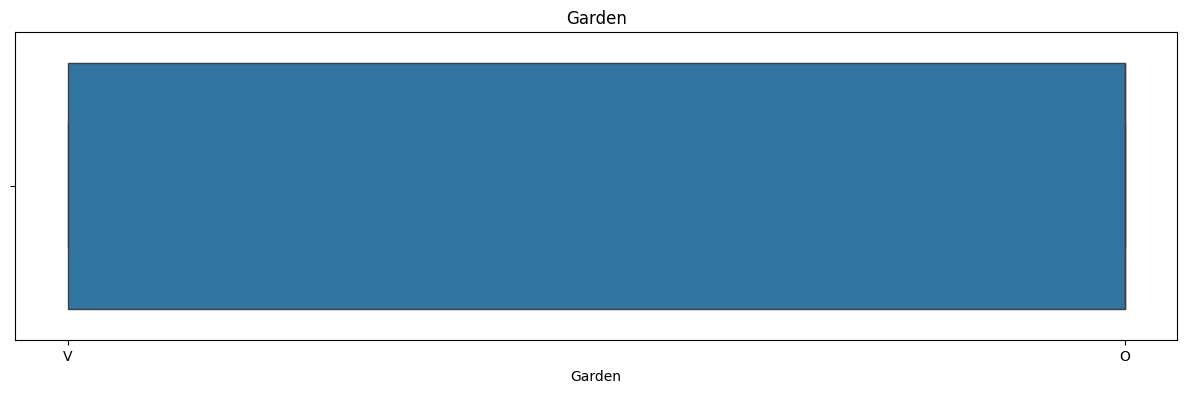

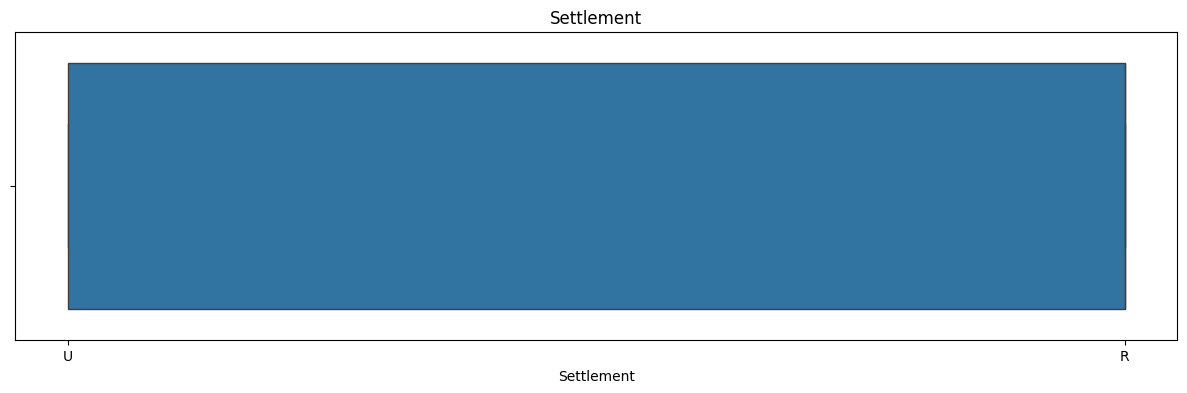

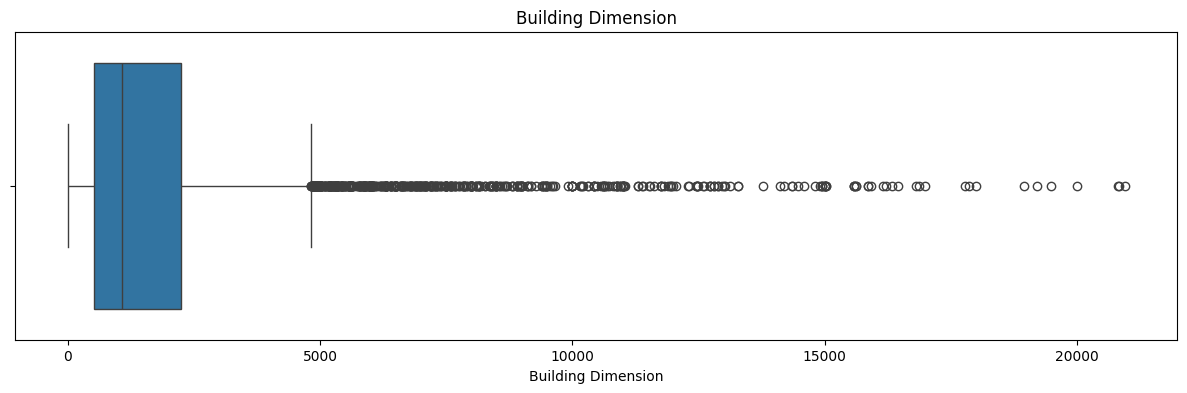

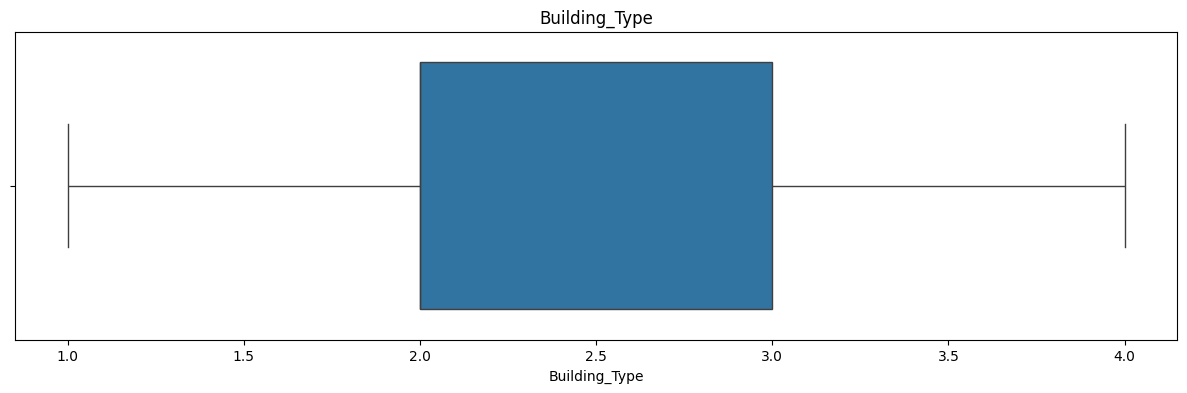

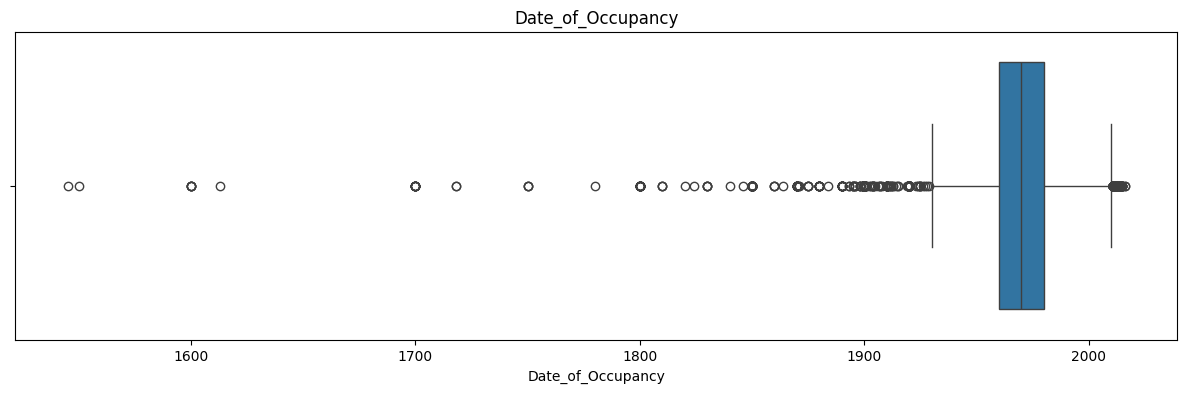

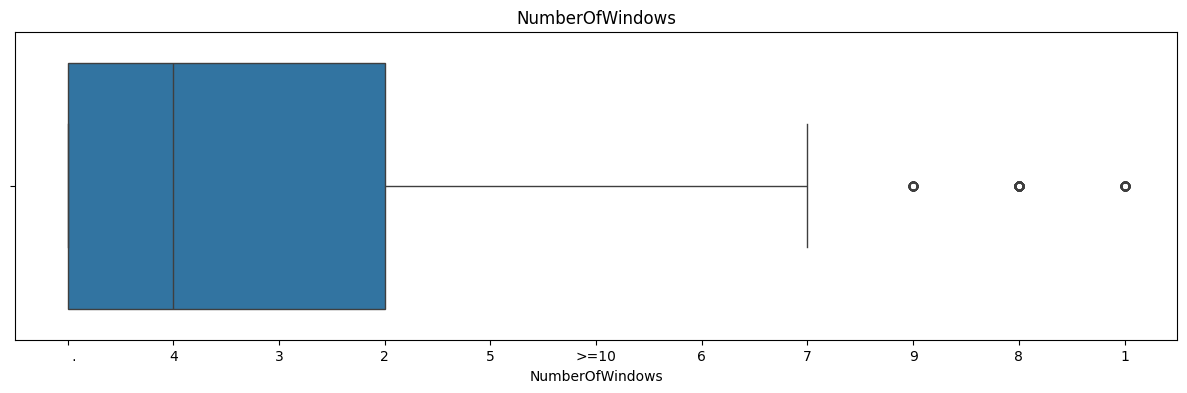

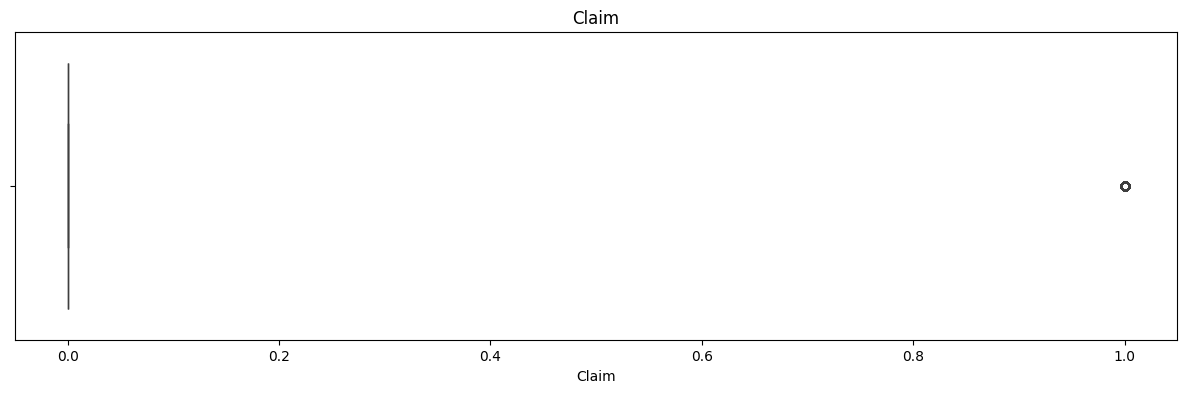

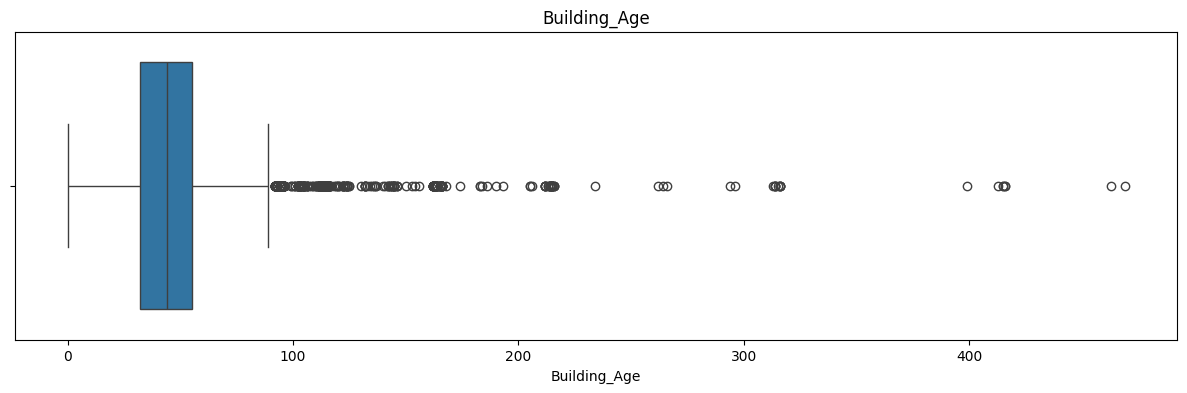

In [34]:
for column in ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim', 'Building_Age']:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data= insurance_df2, x=column)
    plt.title(column)
    plt.show()

Text(0.5, 1.0, 'Analysis of Claim by Settlement')

<Figure size 1000x300 with 0 Axes>

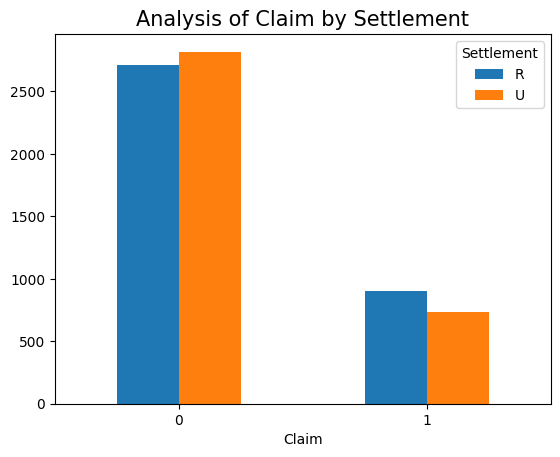

In [35]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Settlement'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Settlement', fontsize=15)

As per above analysis, a higher proportion of the customers insured in rural area (R) filed a claim when compared to urban area(U)

Text(0.5, 1.0, 'Analysis of Claim by Building_Type')

<Figure size 1000x300 with 0 Axes>

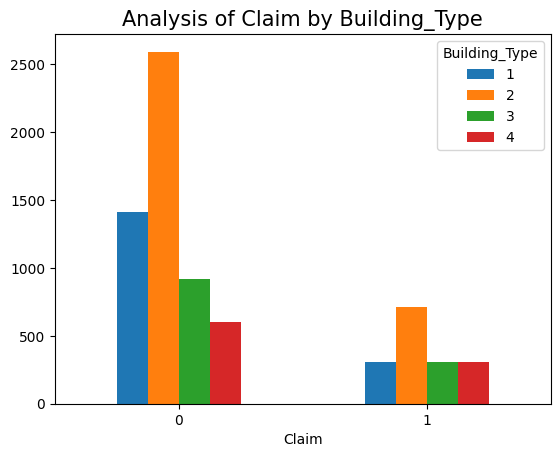

In [36]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Building_Type'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Building_Type', fontsize=15)

Building type 3 & 4 had the highest proportion of claim out of total insured, while building type 2 had the lowest proportion

Text(0.5, 1.0, 'Analysis of Claim by Residential_Status')

<Figure size 1000x300 with 0 Axes>

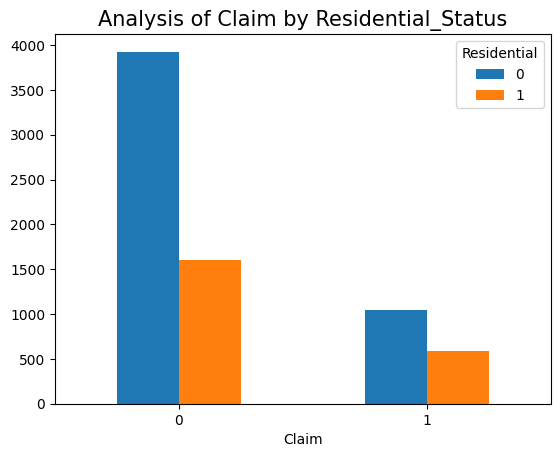

In [37]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Residential'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Residential_Status', fontsize=15)

The above analysis shows that building that are not residential had higher proportion of claim compared to residential building

Text(0.5, 1.0, 'Analysis of Claim by Garden_Status')

<Figure size 1000x300 with 0 Axes>

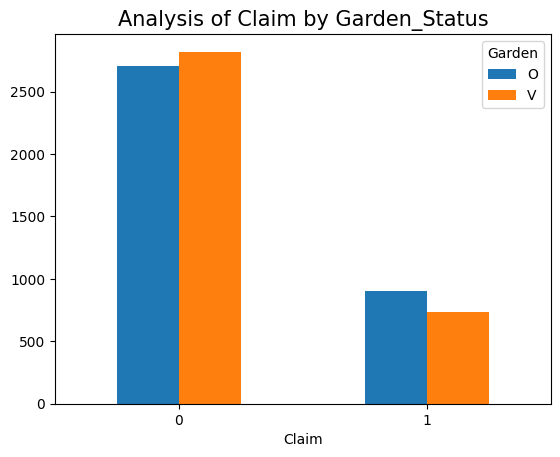

In [38]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Garden'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Garden_Status', fontsize=15)

The above chart indicates that Building with no garden (O) are more likely to file a claim when compared with a building with a garden (V)

Text(0.5, 1.0, 'Analysis of Claim by Building_Fenced')

<Figure size 1000x300 with 0 Axes>

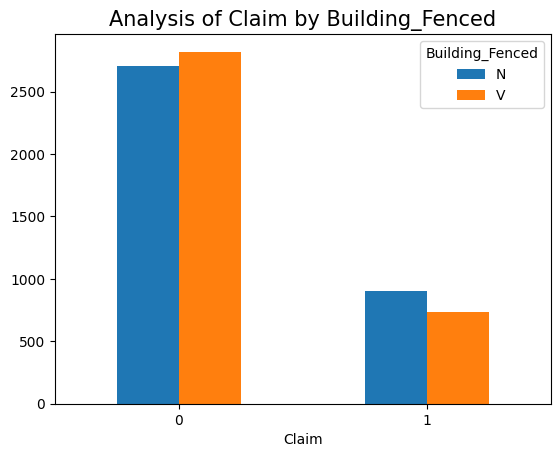

In [39]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Building_Fenced'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Building_Fenced', fontsize=15)

A not-fenced plot (V) has higher proportion of claim than fenced plot (V) which implies a not fenced plot owner is likely to make 
a claim than a fenced plot owner

Text(0.5, 1.0, 'Analysis of Claim by Building_Painted')

<Figure size 1000x300 with 0 Axes>

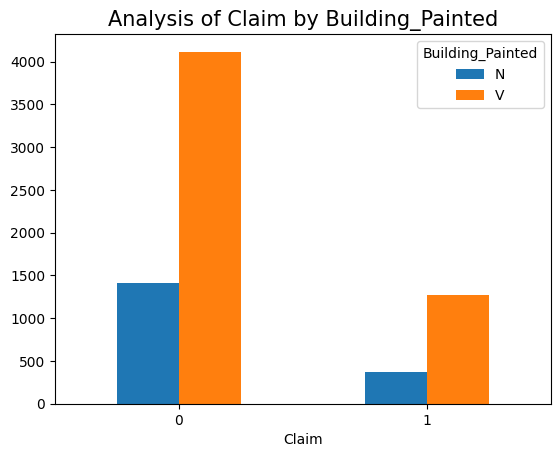

In [40]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['Building_Painted'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by Building_Painted', fontsize=15)

Text(0.5, 1.0, 'Analysis of Claim by NumberOfWindows')

<Figure size 1000x300 with 0 Axes>

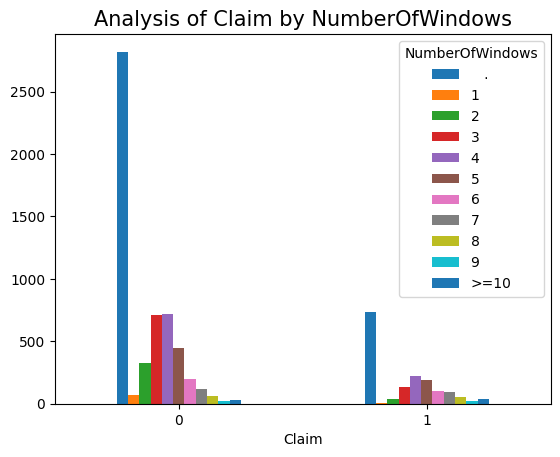

In [41]:
plt.figure(figsize=(10, 3))
x = pd.crosstab(insurance_df2['Claim'], insurance_df2['NumberOfWindows'])
x.plot.bar(rot=0)
plt.title('Analysis of Claim by NumberOfWindows', fontsize=15)

Using only Numeric data in our table

<Axes: >

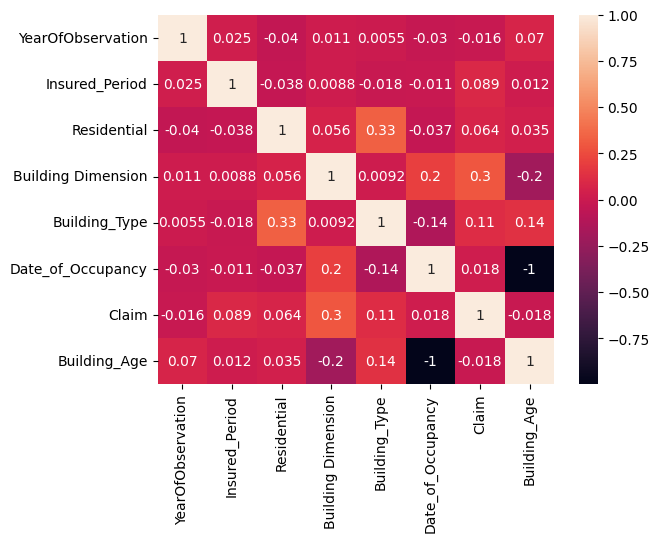

In [42]:
numeric_df = insurance_df2.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

## Comments

The correlation in the above heatmap shows positive correlation between The Insurance claim and the following features:
1. Insured Period
2. Residential
3. Building Dimension
4. Building Type and
5. Date of Occupancy
   
While Building Age and Year of Observation have a negative correlation with the Insurance claim.

<Axes: xlabel='Claim', ylabel='Settlement'>

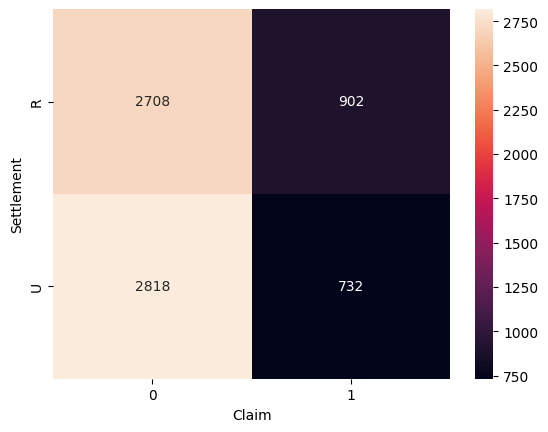

In [43]:
# Grouping the datasety Pclass and Survived

Settlement_group = insurance_df2.groupby(['Settlement', 'Claim'])
Settlement_claim = Settlement_group.size().unstack()

sns.heatmap(Settlement_claim, annot = True, fmt = "d")

<Axes: xlabel='Claim', ylabel='Residential'>

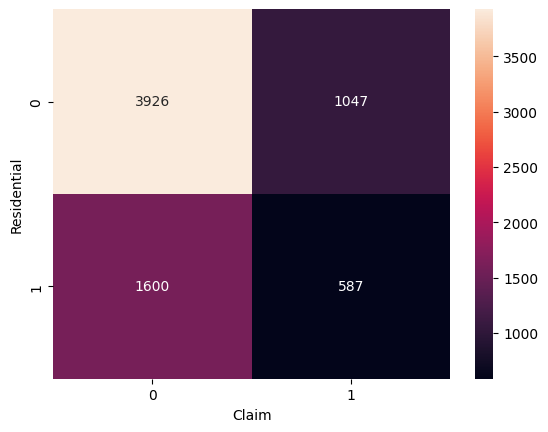

In [44]:
# Grouping the datasety Pclass and Survived

Residential_group = insurance_df2.groupby(['Residential', 'Claim'])
Residential_claim = Residential_group.size().unstack()

sns.heatmap(Residential_claim, annot = True, fmt = "d")

<Axes: xlabel='Claim', ylabel='Building_Fenced'>

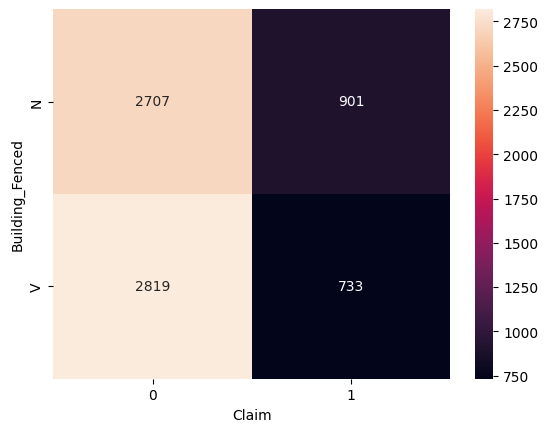

In [45]:
# Grouping the dataset Building_Fenced'and 'Claim

Building_Fenced_group = insurance_df2.groupby(['Building_Fenced', 'Claim'])
Building_Fenced_claim = Building_Fenced_group.size().unstack()

sns.heatmap(Building_Fenced_claim, annot = True, fmt = "d")

<Axes: xlabel='Claim', ylabel='Garden'>

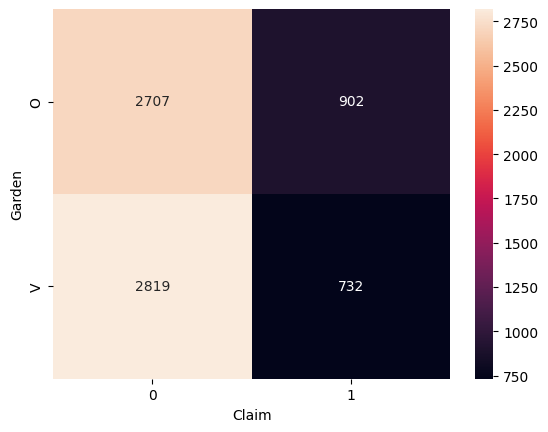

In [46]:
# Grouping the datasety Pclass and Survived

Garden_group = insurance_df2.groupby(['Garden', 'Claim'])
Garden_claim = Garden_group.size().unstack()

sns.heatmap(Garden_claim, annot = True, fmt = "d")

In [47]:
insurance_df2.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Building_Age
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960,.,0,53
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850,4,0,165
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960,.,0,54
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960,.,0,53
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800,3,0,214


In [48]:
# Extracting the independent variable (inputs)
insurance_df3 = insurance_df2.drop(['Customer Id','Claim', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'], axis=1)
insurance_df3.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Age
0,2013,1.0,0,290.0,1,1960,.,53
1,2015,1.0,0,490.0,1,1850,4,165
2,2014,1.0,0,595.0,1,1960,.,54
3,2013,1.0,0,2840.0,1,1960,.,53
4,2014,1.0,0,680.0,1,1800,3,214


In [49]:
# Definition of variables X and Y
X = insurance_df3   # all columns except target
y = insurance_df2["Claim"]                # target column

In [50]:
import numpy as np
import pandas as pd

def clean_features_np(X_train, X_test):
    # 1️⃣ Convert to numeric, coerce bad strings → NaN/NA
    X_train = X_train.apply(pd.to_numeric, errors="coerce")
    X_test  = X_test.apply(pd.to_numeric, errors="coerce")

    # 🔧 CRITICAL FIX: replace pandas NA with numpy nan
    X_train = X_train.astype("float64", errors="ignore")
    X_test  = X_test.astype("float64", errors="ignore")

    X_train = X_train.fillna(np.nan)
    X_test  = X_test.fillna(np.nan)

    # 2️⃣ Convert to NumPy
    X_train = X_train.to_numpy()
    X_test  = X_test.to_numpy()

    # 3️⃣ Replace infinities with NaN
    X_train[np.isinf(X_train)] = np.nan
    X_test[np.isinf(X_test)]   = np.nan

    # 4️⃣ Impute NaN with column medians (train only)
    col_medians = np.nanmedian(X_train, axis=0)

    inds_train = np.where(np.isnan(X_train))
    X_train[inds_train] = np.take(col_medians, inds_train[1])

    inds_test = np.where(np.isnan(X_test))
    X_test[inds_test] = np.take(col_medians, inds_test[1])

    # 5️⃣ Clip extreme values (train-based)
    lower = np.percentile(X_train, 1, axis=0)
    upper = np.percentile(X_train, 99, axis=0)

    X_train = np.clip(X_train, lower, upper)
    X_test  = np.clip(X_test, lower, upper)

    # 6️⃣ Final sanity check
    assert np.isfinite(X_train).all(), "X_train still has invalid values!"
    assert np.isfinite(X_test).all(), "X_test still has invalid values!"

    return X_train, X_test

In [51]:
# Extracting the Features and Target ( the Dependent and Independent Variable)

In [52]:
features = insurance_df3
features

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Age
0,2013,1.000000,0,290.0,1,1960,.,53
1,2015,1.000000,0,490.0,1,1850,4,165
2,2014,1.000000,0,595.0,1,1960,.,54
3,2013,1.000000,0,2840.0,1,1960,.,53
4,2014,1.000000,0,680.0,1,1800,3,214
...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,1083.0,1,2001,.,11
7156,2013,1.000000,0,1083.0,2,1980,.,33
7157,2016,0.038239,0,1083.0,1,1992,.,24
7158,2013,1.000000,0,1083.0,1,1972,.,41


In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int32  
 1   Insured_Period      7160 non-null   float16
 2   Residential         7160 non-null   int16  
 3   Building Dimension  7160 non-null   float16
 4   Building_Type       7160 non-null   int16  
 5   Date_of_Occupancy   7160 non-null   int16  
 6   NumberOfWindows     7160 non-null   string 
 7   Building_Age        7160 non-null   int16  
dtypes: float16(2), int16(4), int32(1), string(1)
memory usage: 167.9 KB


In [54]:
features["NumberOfWindows"] = (
    pd.to_numeric(features["NumberOfWindows"], errors="coerce")
    .fillna(0)
    .astype(int)
)

In [55]:
target = insurance_df2['Claim']
target

0       0
1       0
2       0
3       0
4       0
       ..
7155    0
7156    1
7157    0
7158    0
7159    0
Name: Claim, Length: 7160, dtype: int16

## Feature Importance Plotting

In [56]:
# Importing the decision tree classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [57]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

In [58]:
# importing the train_test split
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
                                               features, target, train_size=0.8)

In [60]:
model.fit(X_train, y_train)

RandomForestClassifier()

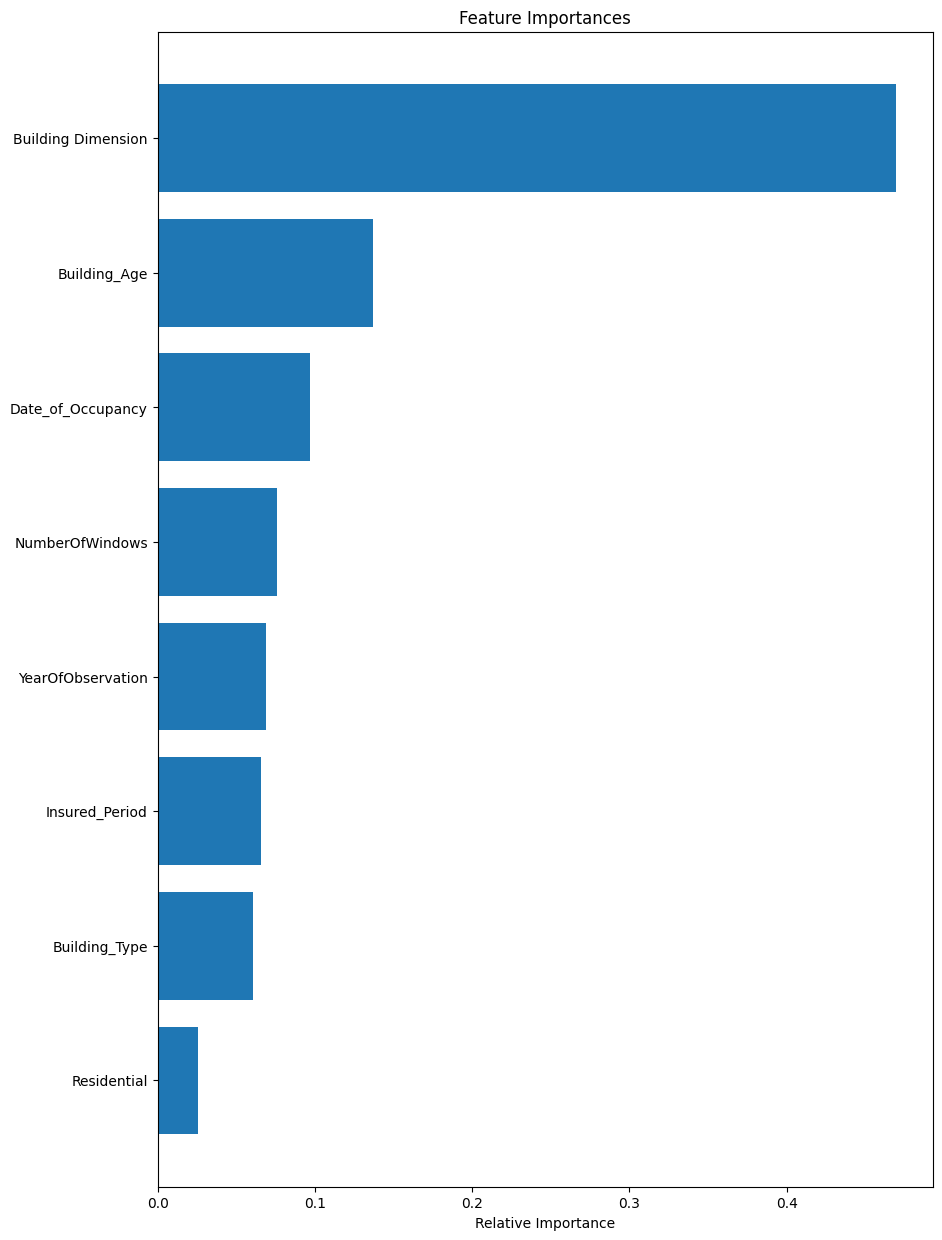

In [61]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Analysis of Feature Importance

From the above analysis, the following are the  5 most important features that determine whether there would be an insurance claim on a building or not.

1. Building Dimension
2. Building Age
3. Date of Occupancy
4. Number of Windows
5. Year of Observation

Contrary to expectation, the Insured period and Building Type have little impact on potential claim by the insured

In [62]:
# Extracting the independent variable (inputs)
inputs = insurance_df2.drop(['Customer Id','Claim', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'], axis=1)
inputs

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Age
0,2013,1.000000,0,290.0,1,1960,.,53
1,2015,1.000000,0,490.0,1,1850,4,165
2,2014,1.000000,0,595.0,1,1960,.,54
3,2013,1.000000,0,2840.0,1,1960,.,53
4,2014,1.000000,0,680.0,1,1800,3,214
...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,1083.0,1,2001,.,11
7156,2013,1.000000,0,1083.0,2,1980,.,33
7157,2016,0.038239,0,1083.0,1,1992,.,24
7158,2013,1.000000,0,1083.0,1,1972,.,41


In [63]:
inputs.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Building_Age'],
      dtype='object')

In [64]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int32  
 1   Insured_Period      7160 non-null   float16
 2   Residential         7160 non-null   int16  
 3   Building Dimension  7160 non-null   float16
 4   Building_Type       7160 non-null   int16  
 5   Date_of_Occupancy   7160 non-null   int16  
 6   NumberOfWindows     7160 non-null   string 
 7   Building_Age        7160 non-null   int16  
dtypes: float16(2), int16(4), int32(1), string(1)
memory usage: 167.9 KB


## Note
The Customer Id will be dropped it would not be useful for our prediction. It is an identifier, not an information
Customer Id is a unique label to distinguish customers.It does not describe the customer or the building.

Machine-learning models look for patterns. An ID has:

1. No order
2. No meaning
3. No relationship to the target (Claim)
4. it adds noise, not signal.

In [65]:
# Extracting the dependent variable (target)
target = insurance_df2['Claim']
target

0       0
1       0
2       0
3       0
4       0
       ..
7155    0
7156    1
7157    0
7158    0
7159    0
Name: Claim, Length: 7160, dtype: int16

In [66]:
from sklearn.preprocessing import LabelEncoder
le_YearOfObservation = LabelEncoder()
le_Insured_Period = LabelEncoder()
le_Residential = LabelEncoder()
le_Building_Dimension = LabelEncoder()
le_Building_Type = LabelEncoder()
le_Date_of_Occupancy = LabelEncoder()
le_NumberOfWindows = LabelEncoder()
le_Building_Age = LabelEncoder()

In [67]:
inputs['YearOfObservation_n'] = le_YearOfObservation.fit_transform(inputs['YearOfObservation'])
inputs['Insured_Period_n'] = le_Insured_Period.fit_transform(inputs['Insured_Period'])
inputs['Residential_n'] = le_Residential.fit_transform(inputs['Residential'])
inputs['Building_Dimension_n'] = le_Building_Dimension.fit_transform(inputs['Building Dimension'])
inputs['Building_Type_n'] = le_Building_Type.fit_transform(inputs['Building_Type'])
inputs['Date_of_Occupancy_n'] = le_Date_of_Occupancy.fit_transform(inputs['Date_of_Occupancy'])
inputs['NumberOfWindows_n'] = le_NumberOfWindows.fit_transform(inputs['NumberOfWindows'])
inputs['Building_Age_n'] = le_Building_Age.fit_transform(inputs['Building_Age'])

In [68]:
inputs

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Age,YearOfObservation_n,Insured_Period_n,Residential_n,Building_Dimension_n,Building_Type_n,Date_of_Occupancy_n,NumberOfWindows_n,Building_Age_n
0,2013,1.000000,0,290.0,1,1960,.,53,1,382,0,119,0,77,0,53
1,2015,1.000000,0,490.0,1,1850,4,165,3,382,0,263,0,15,4,143
2,2014,1.000000,0,595.0,1,1960,.,54,2,382,0,327,0,77,0,54
3,2013,1.000000,0,2840.0,1,1960,.,53,1,382,0,1266,0,77,0,53
4,2014,1.000000,0,680.0,1,1800,3,214,2,382,0,381,0,8,3,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,2012,1.000000,1,1083.0,1,2001,.,11,0,382,1,619,0,118,0,11
7156,2013,1.000000,0,1083.0,2,1980,.,33,1,382,0,619,1,97,0,33
7157,2016,0.038239,0,1083.0,1,1992,.,24,4,11,0,619,0,109,0,24
7158,2013,1.000000,0,1083.0,1,1972,.,41,1,382,0,619,0,89,0,41


In [69]:
# Droping the Word columns
inputs_n = inputs.drop(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Building_Age'], axis='columns')
inputs_n

,YearOfObservation_n,Insured_Period_n,Residential_n,Building_Dimension_n,Building_Type_n,Date_of_Occupancy_n,NumberOfWindows_n,Building_Age_n
0,1,382,0,119,0,77,0,53
1,3,382,0,263,0,15,4,143
2,2,382,0,327,0,77,0,54
3,1,382,0,1266,0,77,0,53
4,2,382,0,381,0,8,3,156
...,...,...,...,...,...,...,...,...
7155,0,382,1,619,0,118,0,11
7156,1,382,0,619,1,97,0,33
7157,4,11,0,619,0,109,0,24
7158,1,382,0,619,0,89,0,41


In [70]:
# Importing the decision tree classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [71]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

In [72]:
# importing the train_test split
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
                                                inputs_n, target, train_size=0.8)

In [74]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
model.score(X_train, y_train)

0.99231843575419

In [76]:
y_predicted = model.predict(X_test)

In [77]:
model.predict_proba(X_test)

array([[0.99 , 0.01 ],
       [0.56 , 0.44 ],
       [0.67 , 0.33 ],
       ...,
       [0.965, 0.035],
       [0.16 , 0.84 ],
       [0.72 , 0.28 ]])

In [78]:
model.score(X_test,y_test)

0.7569832402234636

In [79]:
model.base_estimator_

DecisionTreeClassifier()

In [80]:
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1412784179),
 DecisionTreeClassifier(max_features='sqrt', random_state=1698696425),
 DecisionTreeClassifier(max_features='sqrt', random_state=1967692687),
 DecisionTreeClassifier(max_features='sqrt', random_state=1683210149),
 DecisionTreeClassifier(max_features='sqrt', random_state=1309613540),
 DecisionTreeClassifier(max_features='sqrt', random_state=2058222845),
 DecisionTreeClassifier(max_features='sqrt', random_state=598342496),
 DecisionTreeClassifier(max_features='sqrt', random_state=450203836),
 DecisionTreeClassifier(max_features='sqrt', random_state=149937144),
 DecisionTreeClassifier(max_features='sqrt', random_state=1189683761),
 DecisionTreeClassifier(max_features='sqrt', random_state=1981600186),
 DecisionTreeClassifier(max_features='sqrt', random_state=266935241),
 DecisionTreeClassifier(max_features='sqrt', random_state=147966234),
 DecisionTreeClassifier(max_features='sqrt', random_state=372526845),
 DecisionTre

In [81]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [83]:
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [84]:
# Creating a Claim Insurance dataframe
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [85]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_score = np.round(model.score(X_train, y_train)*100,2)
    train_time = time() - start
    
    start = time()
    y_pred = model.predict(X_test)
    test_score = np.round(model.score(X_test, y_test)*100,2)
    predict_time = time()-start
    
    print(model)
    
    performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 76.59,  Test Score: 75.63

MultinomialNB()
Training score: 65.61,  Test Score: 61.59

ComplementNB()
Training score: 65.59,  Test Score: 61.59

BernoulliNB()
Training score: 76.85,  Test Score: 78.49

LogisticRegression()
Training score: 78.39,  Test Score: 79.19

Lasso()
Training score: 10.47,  Test Score: 6.02

RidgeClassifier()
Training score: 78.54,  Test Score: 79.68

SGDClassifier()
Training score: 35.72,  Test Score: 35.13

SVC()
Training score: 78.06,  Test Score: 79.75

LinearSVC()
Training score: 76.87,  Test Score: 78.35

KNeighborsClassifier()
Training score: 81.56,  Test Score: 75.7

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 78.32,  Test Score: 79.54

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 99.18,  Test Score: 75.49

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training

In [86]:
performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,30.473542,3.015462,99.18,75.49,BaggingClassifier(estimator=ExtraTreesClassifi...
16,1.162706,0.000000,95.25,76.12,"GradientBoostingClassifier(max_depth=10, n_est..."
13,0.260139,0.019773,84.97,78.91,"RandomForestClassifier(max_depth=10, n_estimat..."
17,0.656738,0.008039,84.27,78.91,HistGradientBoostingClassifier()
19,1.914124,0.062687,82.93,79.47,"VotingClassifier(estimators=[('gb', GradientBo..."
10,0.142286,0.048843,81.56,75.70,KNeighborsClassifier()
6,0.006000,0.000000,78.54,79.68,RidgeClassifier()
4,0.038292,0.001000,78.39,79.19,LogisticRegression()
11,0.850713,0.000000,78.32,79.54,"MLPClassifier(hidden_layer_sizes=(5,), max_ite..."
15,0.093382,0.015469,78.09,79.12,"ExtraTreesClassifier(max_depth=6, n_estimators..."


# Applying Scale to increase Accuracy

In [87]:
# Scaling each data by the maximum value (16)
scale_Xtrain = X_train/16
scale_Xtest = X_test/16

In [88]:
scale_Xtest

,YearOfObservation_n,Insured_Period_n,Residential_n,Building_Dimension_n,Building_Type_n,Date_of_Occupancy_n,NumberOfWindows_n,Building_Age_n
2764,0.1875,0.0000,0.0000,7.8125,0.0625,5.4375,0.0000,2.8125
7156,0.0625,23.8750,0.0000,38.6875,0.0625,6.0625,0.0000,2.0625
5090,0.1250,23.8750,0.0625,57.7500,0.1875,1.6250,0.3125,7.1250
6574,0.1250,23.8750,0.0625,55.3750,0.1250,6.5625,0.0000,1.6250
5545,0.0000,17.3125,0.0625,84.0625,0.0625,7.3125,0.2500,0.7500
...,...,...,...,...,...,...,...,...
6725,0.0625,23.8750,0.0625,60.5625,0.1250,4.1875,0.3125,3.9375
3482,0.0000,23.8750,0.0000,92.8750,0.0625,7.6250,0.2500,0.4375
4790,0.0000,23.8750,0.0000,9.6875,0.0000,4.8125,0.1875,3.2500
6876,0.1250,23.8750,0.0625,88.1250,0.1250,6.0625,0.6250,2.1250


In [89]:
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    VotingClassifier([("gb", reg1), ("rf", reg2)])
    #StackingClassifier(estimators=20)
]

In [90]:
# Creating a performance dataframe
scale_performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score','ml_model'])

In [91]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(scale_Xtrain, y_train)
    train_score = np.round(model.score(scale_Xtrain, y_train)*100,2)
    train_time = time() - start
    
    start = time()
    y_pred = model.predict(scale_Xtest)
    test_score = np.round(model.score(scale_Xtest, y_test)*100,2)
    predict_time = time()-start
    
    print(model)
    
    scale_performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 76.59,  Test Score: 75.63

MultinomialNB()
Training score: 68.14,  Test Score: 63.69

ComplementNB()
Training score: 65.59,  Test Score: 61.59

BernoulliNB()
Training score: 76.85,  Test Score: 78.49

LogisticRegression()
Training score: 78.46,  Test Score: 79.61

Lasso()
Training score: 9.47,  Test Score: 5.68

RidgeClassifier()
Training score: 78.56,  Test Score: 79.75

SGDClassifier()
Training score: 65.45,  Test Score: 62.29

SVC()
Training score: 78.06,  Test Score: 79.75

LinearSVC()
Training score: 76.85,  Test Score: 78.49

KNeighborsClassifier()
Training score: 81.56,  Test Score: 75.7

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 78.39,  Test Score: 80.03

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 99.18,  Test Score: 75.49

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training 

In [92]:
scale_performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,27.766995,3.074979,99.18,75.49,BaggingClassifier(estimator=ExtraTreesClassifi...
16,1.213320,0.015036,95.25,76.12,"GradientBoostingClassifier(max_depth=10, n_est..."
13,0.250419,0.013510,84.97,78.91,"RandomForestClassifier(max_depth=10, n_estimat..."
17,0.337696,0.006006,84.27,78.91,HistGradientBoostingClassifier()
19,1.194231,0.060979,82.93,79.47,"VotingClassifier(estimators=[('gb', GradientBo..."
10,0.094488,0.057993,81.56,75.70,KNeighborsClassifier()
6,0.013272,0.001000,78.56,79.75,RidgeClassifier()
4,0.051620,0.008142,78.46,79.61,LogisticRegression()
11,0.485953,0.004418,78.39,80.03,"MLPClassifier(hidden_layer_sizes=(5,), max_ite..."
15,0.110962,0.017795,78.09,79.12,"ExtraTreesClassifier(max_depth=6, n_estimators..."


In [93]:
# Standardizing the Data

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Building_Age
0,0.25,1.0,0.0,0.013799,0.0,0.881104,0.000000,0.113006
1,0.75,1.0,0.0,0.023349,0.0,0.647558,0.444444,0.351812
2,0.50,1.0,0.0,0.028363,0.0,0.881104,0.000000,0.115139
3,0.25,1.0,0.0,0.135558,0.0,0.881104,0.000000,0.113006
4,0.50,1.0,0.0,0.032421,0.0,0.541401,0.333333,0.456290


Step 8: Feature Scaling: Normalization and Standardization

Scale features to a common range or distribution, important for many ML algorithms sensitive to feature magnitudes.

Normalization (Min-Max Scaling): Rescales features between 0 and 1. Good for algorithms like k-NN and neural networks.
Class: MinMaxScaler from sklearn.

.fit_transform(): Learns min/max from data and applies scaling.

In [95]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[0.25       1.         0.         0.01379936 0.         0.88110403
  0.         0.1130064 ]
 [0.75       1.         0.         0.02334909 0.         0.64755839
  0.44444444 0.35181237]
 [0.5        1.         0.         0.0283627  0.         0.88110403
  0.         0.11513859]
 [0.25       1.         0.         0.13555842 0.         0.88110403
  0.         0.1130064 ]
 [0.5        1.         0.         0.03242133 0.         0.54140127
  0.33333333 0.45628998]]


Standardization: Transforms features to have mean = 0 and standard deviation = 1, useful for normally distributed features.
Class: StandardScaler from sklearn.

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[-0.48389585  0.37648721 -0.66315517 -0.69897639 -1.2609779  -0.13964903
  -0.86729471  0.12012927]
 [ 0.96153355  0.37648721 -0.66315517 -0.61060341 -1.2609779  -3.30712912
   0.79242201  3.33877487]
 [ 0.23881885  0.37648721 -0.66315517 -0.56420759 -1.2609779  -0.13964903
  -0.86729471  0.14886718]
 [-0.48389585  0.37648721 -0.66315517  0.42777909 -1.2609779  -0.13964903
  -0.86729471  0.12012927]
 [ 0.23881885  0.37648721 -0.66315517 -0.52664908 -1.2609779  -4.7468928
   0.37749283  4.74693233]]


In [98]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_score = np.round(model.score(X_train, y_train)*100,2)
    train_time = time() - start
    
    start = time()
    y_pred = model.predict(X_test)
    test_score = np.round(model.score(X_test, y_test)*100,2)
    predict_time = time()-start
    
    print(model)
    
    performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 76.59,  Test Score: 75.63

MultinomialNB()
Training score: 65.61,  Test Score: 61.59

ComplementNB()
Training score: 65.59,  Test Score: 61.59

BernoulliNB()
Training score: 76.85,  Test Score: 78.49

LogisticRegression()
Training score: 78.39,  Test Score: 79.19

Lasso()
Training score: 10.47,  Test Score: 6.02

RidgeClassifier()
Training score: 78.54,  Test Score: 79.68

SGDClassifier()
Training score: 76.85,  Test Score: 78.49

SVC()
Training score: 78.06,  Test Score: 79.75

LinearSVC()
Training score: 76.85,  Test Score: 78.49

KNeighborsClassifier()
Training score: 81.56,  Test Score: 75.7

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 70.74,  Test Score: 68.23

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 99.18,  Test Score: 75.49

RandomForestClassifier(max_depth=10, n_estimators=64, random_state=0)
Training

In [99]:
scale_performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,27.766995,3.074979,99.18,75.49,BaggingClassifier(estimator=ExtraTreesClassifi...
16,1.213320,0.015036,95.25,76.12,"GradientBoostingClassifier(max_depth=10, n_est..."
13,0.250419,0.013510,84.97,78.91,"RandomForestClassifier(max_depth=10, n_estimat..."
17,0.337696,0.006006,84.27,78.91,HistGradientBoostingClassifier()
19,1.194231,0.060979,82.93,79.47,"VotingClassifier(estimators=[('gb', GradientBo..."
10,0.094488,0.057993,81.56,75.70,KNeighborsClassifier()
6,0.013272,0.001000,78.56,79.75,RidgeClassifier()
4,0.051620,0.008142,78.46,79.61,LogisticRegression()
11,0.485953,0.004418,78.39,80.03,"MLPClassifier(hidden_layer_sizes=(5,), max_ite..."
15,0.110962,0.017795,78.09,79.12,"ExtraTreesClassifier(max_depth=6, n_estimators..."


In [100]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model = SVC() 
model.fit(X_train, y_train) 

predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1124
           1       0.64      0.13      0.22       308

    accuracy                           0.80      1432
   macro avg       0.72      0.56      0.55      1432
weighted avg       0.77      0.80      0.74      1432



In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.7833465176006158
DecisionTreeClassifier(max_depth=6, min_samples_leaf=19, random_state=1)


In [102]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.769 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
print(grid.best_params_) 
 
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [104]:
grid_predictions = grid.predict(X_test) 

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1124
           1       0.66      0.14      0.23       308

    accuracy                           0.80      1432
   macro avg       0.73      0.56      0.56      1432
weighted avg       0.77      0.80      0.74      1432



In [105]:
model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1368
           1       0.13      0.64      0.22        64

    accuracy                           0.80      1432
   macro avg       0.56      0.72      0.55      1432
weighted avg       0.94      0.80      0.85      1432



## Conclusion

The model performed well on the training data having a score of above 90% but did not do too well on our test data with a score of above 70% 
The gap between  the train and test data seems wide but a test score of above 70% is still okay. However, we explored different ways to improve on the model
to improve its predictive ability.